In [3]:
# z-score and p-value
# July 20, 2021

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # library level or module level
from scipy.special import ndtr # single function

In [4]:
# create a normal distribution
mu = 50  # mu is mean, and sigma is standard deviation
sigma = 10
np.random.seed(0) # set a seed before I use a random number generator
norm_dist = np.random.normal(mu,sigma,100) # generate a normal distribution, with average (mean) at 50, and standard deviation at 10

In [5]:
norm_df = pd.DataFrame(norm_dist, columns=['data']) # generate a dataframe to hold data, and in the future, I need to add z-score and p-value

In [6]:
norm_df.head(10)

,data
0,67.640523
1,54.001572
2,59.787380
3,72.408932
4,68.675580
5,40.227221
6,59.500884
7,48.486428
8,48.967811
9,54.105985


(array([ 1.,  5.,  7., 13., 17., 18., 16., 11.,  7.,  5.]),
 array([24.47010184, 29.29284628, 34.11559072, 38.93833516, 43.7610796 ,
        48.58382404, 53.40656848, 58.22931292, 63.05205736, 67.8748018 ,
        72.69754624]),
 <BarContainer object of 10 artists>)

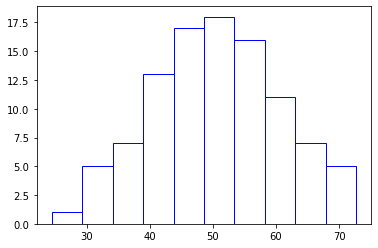

In [7]:
# create a histogram 
plt.hist(norm_df['data'], color='white', ec='blue')

In [8]:
# calcuate the z-score for one value x
x = norm_df.iloc[50,0] #  take the value at row_idx = 50, col_idx = 0
x

41.045334388063246

In [9]:
# calculate z_score by taking the distance between x and the mean (x-mu) and scaled by standard deviation, so we can use normal distribution to compute p-value
z_score = (x-mu)/sigma
z_score

-0.8954665611936754

In [10]:
# p-value: using z-score, and assume the distribution is normal distribution, we can compute p-value
# which is the likelyhood of we observe x or more extreme value of x (see the picture below)
# we use the ndtr function from scipy library
# ndtr returns the area under the standard Gaussian probability density function (another name for normal distribution), 
# integrated from minus infinity to x
# because we need the area under the tail, for z-score that is larger than 0, we need to use 1-ndtr(z_score)
# for z-score that is smaller than zero, ndtr(z-score) is enough. 
# However, in order to calculate both values with one line, we take advantage of the symmetry of the normal distribution
# and use 1-ndtr(abs(z_score)) instead
p_value = 1-ndtr(abs(z_score))
p_value

0.18526886662103625

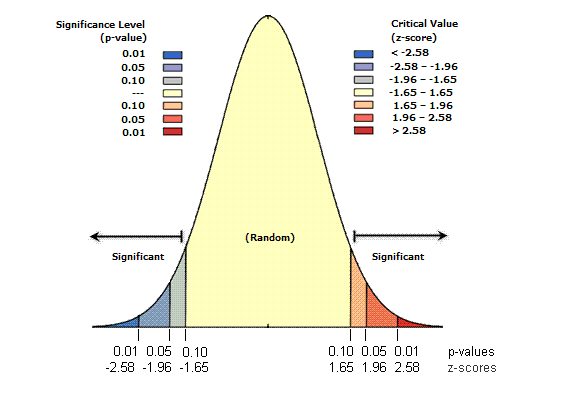

In [11]:
# above image from: https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-statistics/what-is-a-z-score-what-is-a-p-value.htm

In [12]:
# compute all z-scores and p-values for the dataset

In [13]:
norm_df['z_score'] = [(x-mu)/sigma for x in norm_df['data']]

In [14]:
norm_df.head(10)

,data,z_score
0,67.640523,1.764052
1,54.001572,0.400157
2,59.787380,0.978738
3,72.408932,2.240893
4,68.675580,1.867558
5,40.227221,-0.977278
6,59.500884,0.950088
7,48.486428,-0.151357
8,48.967811,-0.103219
9,54.105985,0.410599


In [15]:
# add p-value
norm_df['p_value'] = [1-ndtr(abs(x)) for x in norm_df['z_score']]

In [16]:
norm_df.head(10)

,data,z_score,p_value
0,67.640523,1.764052,0.038862
1,54.001572,0.400157,0.344520
2,59.787380,0.978738,0.163855
3,72.408932,2.240893,0.012516
4,68.675580,1.867558,0.030912
5,40.227221,-0.977278,0.164216
6,59.500884,0.950088,0.171034
7,48.486428,-0.151357,0.439847
8,48.967811,-0.103219,0.458895
9,54.105985,0.410599,0.340683


In [23]:
# round to two digits, display the first 10 rows
norm_df.apply(lambda x: round(x,2)).head(10)

,data,z_score,p_value
0,67.64,1.76,0.04
1,54.00,0.40,0.34
2,59.79,0.98,0.16
3,72.41,2.24,0.01
4,68.68,1.87,0.03
5,40.23,-0.98,0.16
6,59.50,0.95,0.17
7,48.49,-0.15,0.44
8,48.97,-0.10,0.46
9,54.11,0.41,0.34


In [ ]:
# value 67.64 is further away from 50, so it has a smaller p-value than 54.00, which is closer to 50.
# Again, p-value measures the probability of observing a value or more extreme.
# for example, a p-value of 0.04 for 67.64 means that there is 4% of chance to observe 67.64 or LARGER.
# on the other hand, a p-value of 0.16 for 40.23 means that there is 16% chance to observe 40.23 or SMALLER.